# Pandas cookbook

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Creating DataFrames

### Building a DataFrame

Pass a dictionary of {column_name: column_values}. Using list(zip()) may be useful for adding names to values

In [21]:
my_df = pd.DataFrame({'A': [1, 2, 3], 'B': ['I', 'II', 'III']})
print(my_df)

   A    B
0  1    I
1  2   II
2  3  III


Broadcast a single value to all rows

In [27]:
my_df = pd.DataFrame({'A': [1, 2, 3], 'Type': 'Number'})
print(my_df)

   A    Type
0  1  Number
1  2  Number
2  3  Number


Random numbers in a DataFrame

In [22]:
my_df = pd.DataFrame(np.random.randint(low=0, high=10, size=(3,3)),
                     columns=['A', 'B', 'C'])
print(my_df)

   A  B  C
0  6  8  7
1  3  8  6
2  6  9  0


Setting the index

In [4]:
my_df = pd.DataFrame(np.random.randint(low=0, high=10, size=(3,3)),
                     columns=['On', 'Tw', 'Th'])
my_df.index = ['Fir', 'Sec', 'Thi']
print(my_df)

     On  Tw  Th
Fir   8   8   2
Sec   6   5   5
Thi   5   0   9


### Reading Into a DataFrame

From CSV:

In [19]:
df = pd.read_csv('./volc_holocene.csv',
                 header=0,    # Give the row with the column names
                              # Start reading data from after this point
                              # Can be a list for setting a multi-index
                              # Set None if there are no names
                 delimiter=',', # Override the delimiter
                 comment='#', # Specify a comment marker
                 nrows=3,     # Limit the number of rows to read
                 index_col='Number', # Give a column name or number to
                )                    #    become the index
df.head()

,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
Number,,,,,,,,,,,
210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)


#### To a numpy array

From a text file: (homogeneous)

In [10]:
data = np.loadtxt('dimensions.txt',   # Source file
                  skiprows=1,         # A number of rows to skip at the top
                  usecols=[1, 2, 3, 4],   # A list of row indices to take
                  dtype=int,          # Specify the data type
                  delimiter='/')      # Default is whitespace
data

array([[ 400,  180,  160, 1400],
       [  20,    8,    7,    1],
       [ 140,   50,   40,   35]])

Loading a structured (heterogeneous) array:

In [16]:
data = np.genfromtxt('dimensions.txt',
                     dtype=None,                    # Infer column data types
                     delimiter='/',
                     names=True)                    # Store column names from first row
np.shape(data)          # This is a 1-D array, with labelled entries for each row
data[2]['Weight']       # Access by index AND/OR column number

35

The default dtype here is None, and we get a record array:

In [18]:
data = np.recfromtxt('dimensions.txt', delimiter='/', names=True)
data

rec.array([(b'Car', 400, 180, 160, 1400), (b'Bread',  20,   8,   7,    1),
 (b'Coffee Table', 140,  50,  40,   35)], 
          dtype=[('Name', 'S12'), ('Length', '<i4'), ('Width', '<i4'), ('Height', '<i4'), ('Weight', '<i4')])

Loading and plotting pixel data:

In [ ]:
# values = np.readtext(input_file)  # Assumes whitespace-separated
# image_square = np.reshape(values, (h, w))
# plt.imshow(image_square, cmap='Greys', interpolation='nearest')
# plt.show()

## Exploring a DataFrame

### Examining values

In [13]:
n = 3
df.head(n)    # Show the first n rows, default 5
df.tail(n)    # Show the last n rows, default 5

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
1505,390812,"Rittmann, Mount",Antarctica,Antarctica,Shield,Unrest / Pleistocene,Unknown,-73.45,165.50,2600,NaN,Intraplate / Continental Crust (>25 km)
1506,390829,James Ross Island,Antarctica,Antarctica,Shield,Evidence Credible,Unknown,-64.15,-57.75,1630,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
1507,390847,Melville,Antarctica,Antarctica,Stratovolcano,Evidence Uncertain,Unknown,-62.02,-57.67,549,NaN,Intraplate / Continental Crust (>25 km)


In [16]:
df.values    # Convert to np.array

array([[210010, 'West Eifel Volcanic Field', 'Germany', ..., 600,
        'Foidite', 'Rift Zone / Continental Crust (>25 km)'],
       [210020, 'Chaine des Puys', 'France', ..., 1464,
        'Basalt / Picro-Basalt', 'Rift Zone / Continental Crust (>25 km)'],
       [210030, 'Olot Volcanic Field', 'Spain', ..., 893,
        'Trachybasalt / Tephrite Basanite',
        'Intraplate / Continental Crust (>25 km)'],
       ..., 
       [390812, 'Rittmann, Mount', 'Antarctica', ..., 2600, nan,
        'Intraplate / Continental Crust (>25 km)'],
       [390829, 'James Ross Island', 'Antarctica', ..., 1630,
        'Basalt / Picro-Basalt', 'Intraplate / Continental Crust (>25 km)'],
       [390847, 'Melville', 'Antarctica', ..., 549, nan,
        'Intraplate / Continental Crust (>25 km)']], dtype=object)

In [24]:
df.columns    # Get or set the column names

Index(['Number', 'Name', 'Country', 'Region', 'Type', 'Activity Evidence',
       'Last Known Eruption', 'Latitude', 'Longitude', 'Elevation (Meters)',
       'Dominant Rock Type', 'Tectonic Setting'],
      dtype='object')

In [25]:
df.index    # Get or set the DataFrame's index

RangeIndex(start=0, stop=1508, step=1)

In [26]:
# Access a column
df['Name']            # As a Series
df[['Name']]          # As a DataFrame
df[['Name', 'Type']]  # Multiple columns!

,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
Number,,,,,,,,,,,
210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.87,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)


In [32]:
# Access rows
df.loc[210010]               # By key. As a Series
df.loc[[210010]]             # As a DataFrame
df.loc[[210010, 390847]]     # Multiple rows

df.iloc[0]                   # By row index. As a Series
df.iloc[[0]]                 # As a DataFrame
df[slice(3,10,3)]               # Use a slice! Also df.iloc[slice(3,4)]

,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
Number,,,,,,,,,,,
210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.87,-4.020,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
211004,Colli Alban,Italy,Mediterranean and Western Asia,Caldera,Evidence Uncertain,Unknown,41.73,12.700,949,Foidite,Subduction Zone / Continental Crust (>25 km)
211030,Ischia,Italy,Mediterranean and Western Asia,Complex,Eruption Observed,1302 CE,40.73,13.897,789,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km)


In [21]:
# Rows and columns!
df.loc[[210010, 390847], ['Name', 'Type']]
df.loc[[210010, 390847], :]                  # Slice to get all values!
df.iloc[:, ['Name', 'Type']]

,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
Number,,,,,,,,,,,
210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.17,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
390847,Melville,Antarctica,Antarctica,Stratovolcano,Evidence Uncertain,Unknown,-62.02,-57.67,549,NaN,Intraplate / Continental Crust (>25 km)


### Filtering

Select based on a criteria by creating a boolean array, then passing it as an index to the DataFrame

In [19]:
df = pd.DataFrame(np.random.randint(10, 100, (100, 3)), columns=['A', 'B', 'C'])
big_B = df.B > 90
df[big_B]         # Or all together as df[df.B > 90]

,A,B,C
73,13,94,51
74,13,97,55
82,83,98,59
84,95,99,62
94,27,95,14


Apply a function to a DataFrame or Series.

In [28]:
df.apply(type)

A    <class 'pandas.core.series.Series'>
B    <class 'pandas.core.series.Series'>
C    <class 'pandas.core.series.Series'>
dtype: object

### Iteration

Iterate through the column names in the dataframe.

In [24]:
for column_name in df:
    if int(label) % 13 == 0:
        print(column_name)

Iterate through the rows, with the indices. The row comes as a Series.

In [23]:
for label, row in df.iterrows():
    print(label, row.iloc[0])

0 23
1 86
2 45
3 50
4 56
5 14
6 10
7 47
8 32
9 56
10 70
11 20
12 38
13 38
14 79
15 74
16 79
17 68
18 91
19 40
20 96
21 23
22 23
23 80
24 76
25 50
26 69
27 16
28 55
29 39
30 41
31 69
32 84
33 72
34 69
35 14
36 15
37 63
38 83
39 60
40 94
41 48
42 69
43 10
44 78
45 86
46 50
47 30
48 19
49 19
50 74
51 96
52 20
53 24
54 19
55 74
56 80
57 59
58 61
59 85
60 99
61 59
62 81
63 13
64 52
65 87
66 69
67 57
68 33
69 37
70 72
71 48
72 18
73 13
74 13
75 32
76 39
77 21
78 55
79 35
80 67
81 47
82 83
83 46
84 95
85 73
86 99
87 95
88 17
89 57
90 92
91 32
92 48
93 43
94 27
95 40
96 50
97 96
98 58
99 18


### Analysis

In [14]:
df.info()    # Info on column types and counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 12 columns):
Number                 1508 non-null int64
Name                   1508 non-null object
Country                1508 non-null object
Region                 1508 non-null object
Type                   1508 non-null object
Activity Evidence      1507 non-null object
Last Known Eruption    1508 non-null object
Latitude               1508 non-null float64
Longitude              1508 non-null float64
Elevation (Meters)     1508 non-null int64
Dominant Rock Type     1455 non-null object
Tectonic Setting       1501 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 141.5+ KB


In [15]:
df.describe()   # Basic statistics on column values 

,Number,Latitude,Longitude,Elevation (Meters)
count,1508.000000,1508.000000,1508.000000,1508.000000
mean,296656.110743,14.083156,23.391469,1683.357427
std,48861.852600,31.871107,113.656588,1571.102885
min,210010.000000,-78.500000,-179.970000,-4200.000000
25%,261157.500000,-7.068750,-78.274250,687.250000
50%,300015.000000,13.861500,38.390000,1464.000000
75%,342123.250000,41.748750,138.578000,2352.250000
max,390847.000000,85.608000,179.580000,6879.000000


## Plotting DataFrames

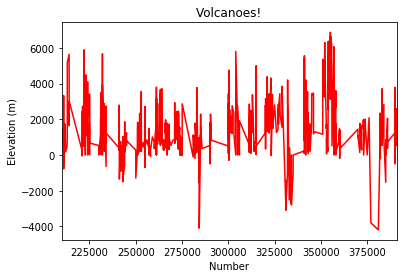

In [60]:
df['Elevation (Meters)'].plot(color='red')    # Create a plot from the DataFrame. Include attributes
plt.title('Volcanoes!')
plt.xlabel('Number')
plt.ylabel('Elevation (m)')
plt.show()

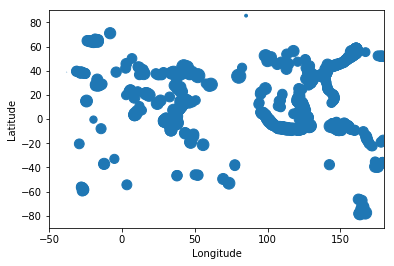

In [139]:
positive_elevations = (df['Elevation (Meters)'] + abs(df['Elevation (Meters)'].min()) + 1).astype(int).values / 50
# Choose a type of plot. Scatterplots allow an additional argument for the size of the dots.
df.plot.scatter(x='Longitude', y='Latitude', s=positive_elevations)  # Specify source for x and y data
# df.plot(x='Longitude', y='Latitude', kind='scatter')    # Alternative syntax
plt.axis((-50, 180, -90, 90))   # Limit the section shown
plt.show()

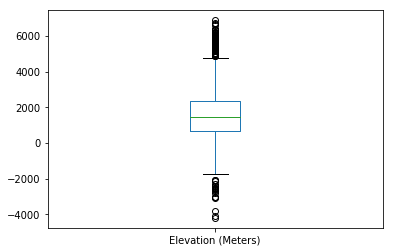

In [101]:
df.plot(kind='box', y='Elevation (Meters)')    # Box plot
plt.show()

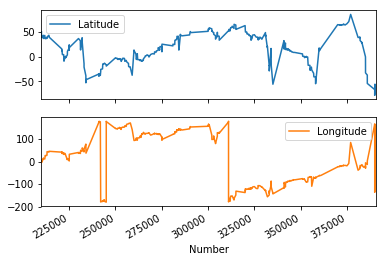

In [71]:
df[['Latitude', 'Longitude']].plot(subplots=True)   # Show different columns on different plots
plt.show()

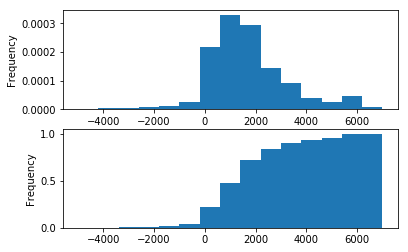

In [147]:
fig, axes = plt.subplots(nrows=2, ncols=1)    # Get subplots beforehand. This allows specifying axis labels
df['Elevation (Meters)'].plot.hist(ax=axes[0], normed=True,       # Set the number of bins and slice of the histogram
                                   bins=15, range=(-5000, 7000))  # This graphs the Probability Density Function
df['Elevation (Meters)'].plot.hist(ax=axes[1], normed=True, cumulative=True,
                                   bins=15, range=(-5000, 7000))  # Make it a Cumulative Density Function
plt.show()